## House Loan Data Analysis

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [2]:
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows = None

In [52]:
data_main = pd.read_csv(r"E:\Github\Datasets\loan_data.csv", low_memory = False)

In [53]:
df = data_main.copy(deep = True)

In [54]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df.info(verbose = True, show_counts=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [56]:
df['SK_ID_CURR'].nunique() == df.shape[0]

True

In [57]:
df = df.drop('SK_ID_CURR', axis = 1)

In [58]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [43]:
def create_nulls_df(dataframe):
    nulls_count = dataframe.isna().sum()[dataframe.isna().sum() > 0]
    nulls_info_df = pd.DataFrame({'column':nulls_count.index, 
                                  'null_values': nulls_count.values}).sort_values(by=['null_values'])
    nulls_info_df['nulls_percent'] = ((nulls_info_df['null_values']/df.shape[0])*100).round(2)

    return nulls_info_df

In [45]:
nulls_info_df = create_nulls_df(dataframe=df)
nulls_info_df

,column,null_values,nulls_percent
60,DAYS_LAST_PHONE_CHANGE,1,0.00
5,CNT_FAM_MEMBERS,2,0.00
0,AMT_ANNUITY,12,0.00
1,AMT_GOODS_PRICE,278,0.09
7,EXT_SOURCE_2,660,0.21
59,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.33
58,OBS_60_CNT_SOCIAL_CIRCLE,1021,0.33
57,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.33
56,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.33
2,NAME_TYPE_SUITE,1292,0.42


In [20]:
nulls_info_df.shape

(67, 3)

In [26]:
cols_missing_more_40_percent = nulls_info_df[nulls_info_df['nulls_percent'] > 40]['column'].to_list()
print(cols_missing_more_40_percent)

['EMERGENCYSTATE_MODE', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'HOUSETYPE_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'WALLSMATERIAL_MODE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'EXT_SOURCE_1', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'LANDAREA_MODE', 'LANDAREA_MEDI', 'LANDAREA_AVG', 'OWN_CAR_AGE', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'COMMONAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI

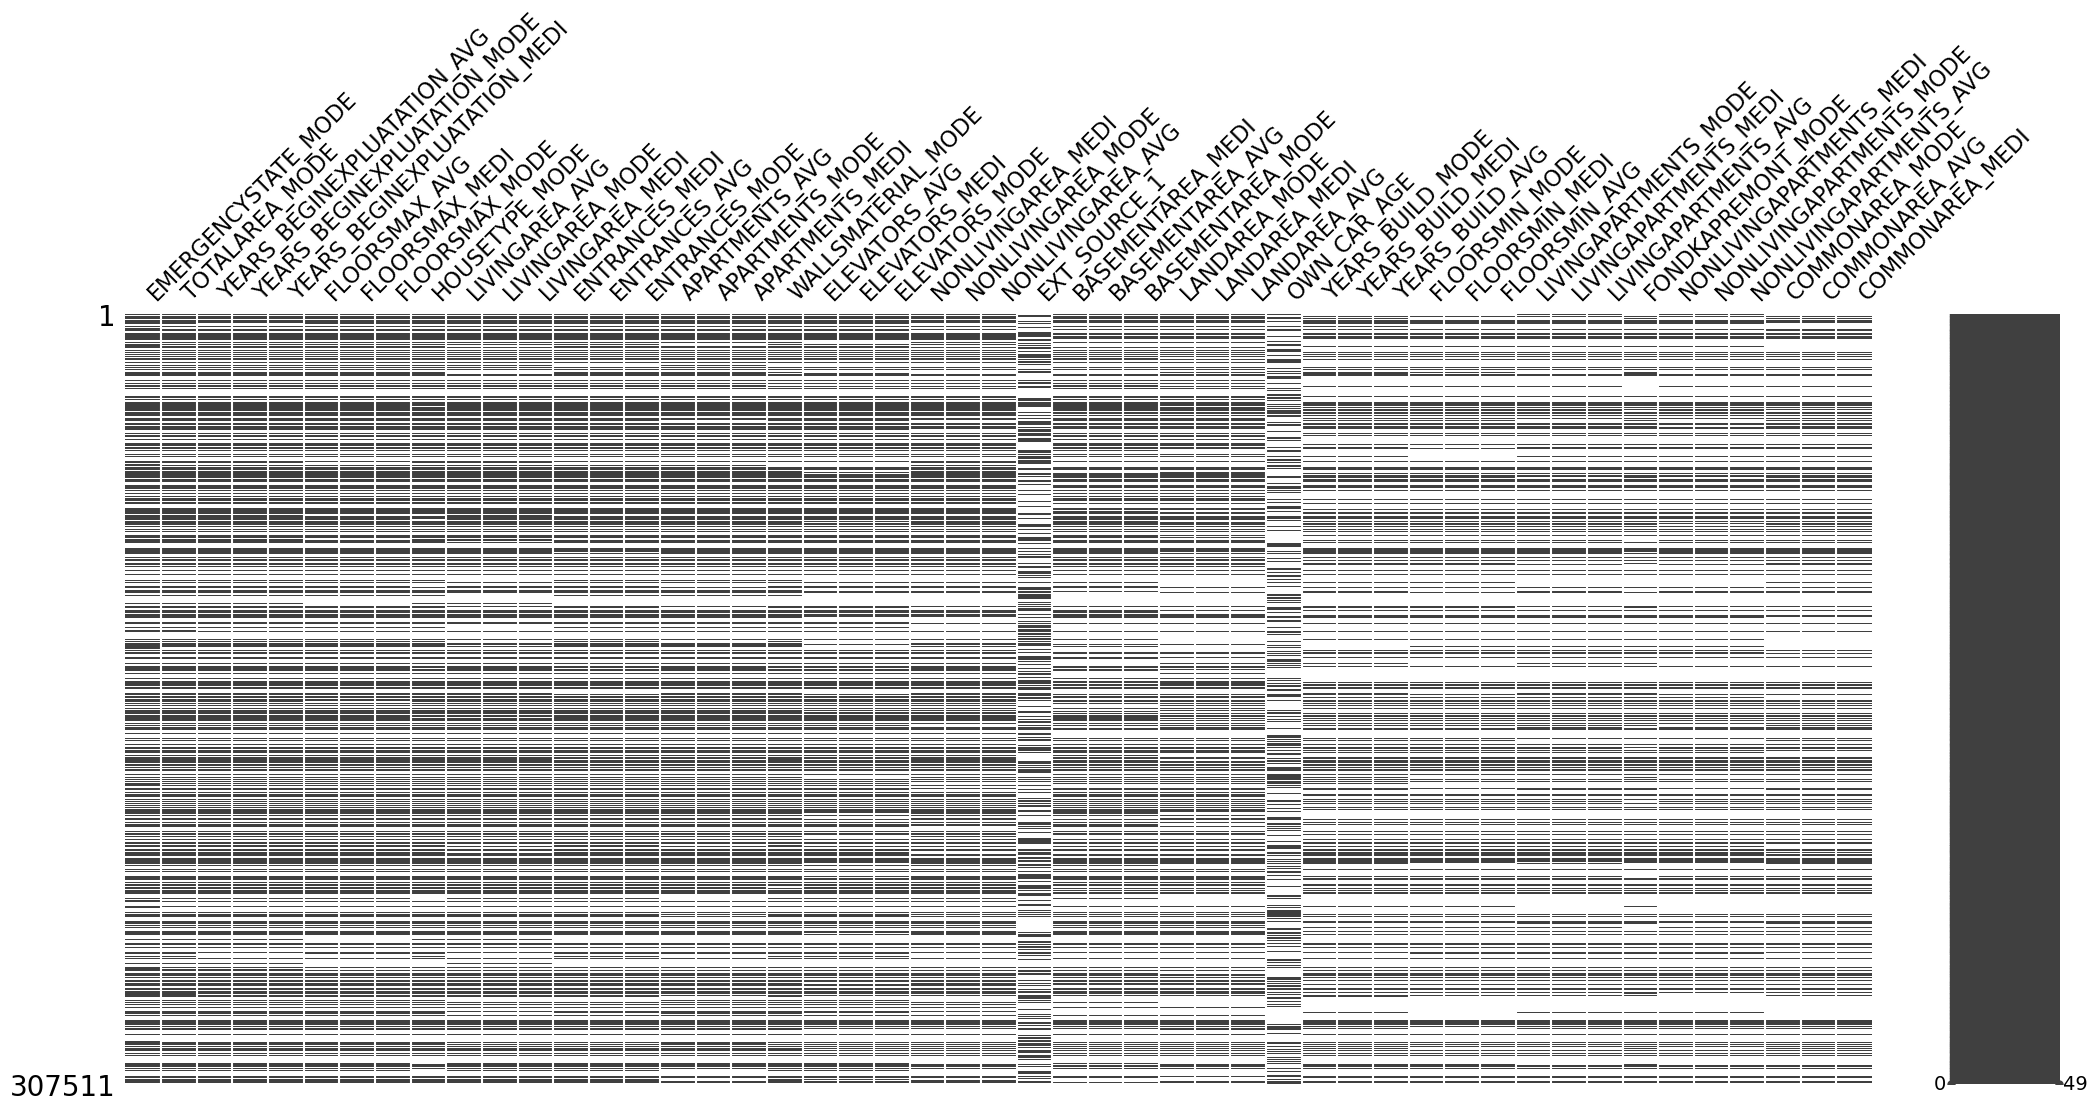

In [37]:
msno.matrix(df[cols_missing_more_40_percent]);

In [33]:
df_dropped_na = df.dropna(axis=0, how="any")

In [34]:
df.shape[0] - df_dropped_na.shape[0]

298909

In [35]:
round(((df.shape[0] - df_dropped_na.shape[0])/df.shape[0])*100,2)

97.2

In [13]:
df_dropped_na.shape

(8602, 121)

In [14]:
df_dropped_na['TARGET'].value_counts()

0    8076
1     526
Name: TARGET, dtype: int64

In [38]:
df_dropped_na_controlled = df.dropna(subset = cols_missing_more_40_percent,axis=0, how="all")

In [40]:
df.shape[0] - df_dropped_na_controlled.shape[0]

56111

In [41]:
round(((df.shape[0] - df_dropped_na_controlled.shape[0])/df.shape[0])*100,2)

18.25

In [47]:
nulls_df_after_rows_removed = create_nulls_df(df_dropped_na_controlled)
nulls_df_after_rows_removed

,column,null_values,nulls_percent
60,DAYS_LAST_PHONE_CHANGE,1,0.00
5,CNT_FAM_MEMBERS,2,0.00
0,AMT_ANNUITY,10,0.00
1,AMT_GOODS_PRICE,198,0.06
7,EXT_SOURCE_2,491,0.16
59,DEF_60_CNT_SOCIAL_CIRCLE,905,0.29
58,OBS_60_CNT_SOCIAL_CIRCLE,905,0.29
57,DEF_30_CNT_SOCIAL_CIRCLE,905,0.29
56,OBS_30_CNT_SOCIAL_CIRCLE,905,0.29
2,NAME_TYPE_SUITE,1060,0.34


In [63]:
cols_to_remove = nulls_df_after_rows_removed[nulls_df_after_rows_removed['nulls_percent'] > 45]['column'].to_list()
print(cols_to_remove)

['OWN_CAR_AGE', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'COMMONAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI']


In [64]:
len(cols_to_remove)

17

In [61]:
df = df.drop(cols_to_remove, axis = 1)

In [62]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
(df.shape[1] + len(cols_to_remove) + 1) == (data_main.shape[1])

True

In [95]:
null_columns_list = df.isnull().sum().index.to_list()
print(null_columns_list)

['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LI

In [96]:
obj_type_cols = df.select_dtypes(include='object').columns
print(obj_type_cols)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [98]:
set(obj_type_cols).difference(set(null_columns_list))

set()

In [ ]:
set(lst1) & set(lst2)

In [83]:
non_obj_type_cols = df.select_dtypes(exclude='object').info()
non_obj_type_cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 89 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   TARGET                        307511 non-null  int64  
 1   CNT_CHILDREN                  307511 non-null  int64  
 2   AMT_INCOME_TOTAL              307511 non-null  float64
 3   AMT_CREDIT                    307511 non-null  float64
 4   AMT_ANNUITY                   307499 non-null  float64
 5   AMT_GOODS_PRICE               307233 non-null  float64
 6   REGION_POPULATION_RELATIVE    307511 non-null  float64
 7   DAYS_BIRTH                    307511 non-null  int64  
 8   DAYS_EMPLOYED                 307511 non-null  int64  
 9   DAYS_REGISTRATION             307511 non-null  float64
 10  DAYS_ID_PUBLISH               307511 non-null  int64  
 11  FLAG_MOBIL                    307511 non-null  int64  
 12  FLAG_EMP_PHONE                307511 non-nul